In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
%matplotlib inline

#File where I did my quick assessment of the data

In [47]:
with open('titanic_cleaned.csv') as f:
    df = pd.read_csv(f, dtype={'Age': np.float64})

In [48]:
cols = {}
for col in df.columns:
    cols[col] = col.title()
df = df.rename(columns=cols)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         1309 non-null   object 
 1   Passengerid  1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Survived     1309 non-null   int64  
 4   Sex          1309 non-null   int64  
 5   Age          1309 non-null   float64
 6   Age_Rnd      1309 non-null   int64  
 7   Sibsp        1309 non-null   int64  
 8   Parch        1309 non-null   int64  
 9   Ticket       1309 non-null   object 
 10  Fare         1309 non-null   float64
 11  Cabin        1309 non-null   object 
 12  Decks        1309 non-null   int64  
 13  Location     1309 non-null   int64  
 14  Embarked     1309 non-null   int64  
 15  Boat         486 non-null    object 
 16  Body         121 non-null    float64
 17  Home.Dest    745 non-null    object 
dtypes: float64(3), int64(10), object(5)
memory usage

In [50]:
df.describe()

,Passengerid,Pclass,Survived,Sex,Age,Age_Rnd,Sibsp,Parch,Fare,Decks,Location,Embarked,Body
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,121.000000
mean,655.148969,2.294882,0.381971,0.355997,30.017698,29.859435,0.498854,0.385027,33.279975,5.012223,0.652406,1.493506,160.809917
std,378.075043,0.837836,0.486055,0.478997,13.207501,13.214131,1.041658,0.865560,51.741920,1.434024,0.661782,0.814244,97.696922
min,1.000000,1.000000,0.000000,0.000000,0.166700,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,328.000000,2.000000,0.000000,0.000000,21.700000,21.000000,0.000000,0.000000,7.895800,5.000000,0.000000,1.000000,72.000000
50%,655.000000,3.000000,0.000000,0.000000,30.000000,30.000000,0.000000,0.000000,14.454200,5.000000,1.000000,2.000000,155.000000
75%,982.000000,3.000000,1.000000,1.000000,35.000000,35.000000,1.000000,0.000000,31.275000,6.000000,1.000000,2.000000,256.000000
max,1309.000000,3.000000,1.000000,1.000000,80.000000,80.000000,8.000000,9.000000,512.329200,7.000000,2.000000,2.000000,328.000000


In [51]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
df['age_binned'] = pd.cut(df.Age, bins, right=True, include_lowest=False)
# child variable
df['Child'] = (df.Age < 16).astype(int)
surv = df[df.Survived == 1]
surv.head()

,Name,Passengerid,Pclass,Survived,Sex,Age,Age_Rnd,Sibsp,Parch,Ticket,Fare,Cabin,Decks,Location,Embarked,Boat,Body,Home.Dest,age_binned,Child
1,"Rosenbaum, Miss. Edith Louise",1100,1,1,1,33.0,33,0,0,PC 17613,27.7208,A11,1,0,0,11,NaN,"Paris, France","(30, 40]",0
2,"Duff Gordon, Lady. (Lucille Christiana Sutherl...",557,1,1,1,48.0,48,1,0,11755,39.6000,A16,1,0,0,1,NaN,London / Paris,"(40, 50]",0
5,"Duff Gordon, Sir. Cosmo Edmund (""Mr Morgan"")",600,1,1,0,49.0,49,1,0,PC 17485,56.9292,A20,1,0,0,1,NaN,London / Paris,"(40, 50]",0
6,"Simonius-Blumer, Col. Oberst Alfons",648,1,1,0,56.0,56,0,0,13213,35.5000,A26,1,0,0,3,NaN,"Basel, Switzerland","(50, 60]",0
8,"Blank, Mr. Henry",210,1,1,0,40.0,40,0,0,112277,31.0000,A31,1,0,0,7,NaN,"Glen Ridge, NJ","(30, 40]",0


In [52]:
total = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Body,1188,90.8
Boat,823,62.9
Home.Dest,564,43.1
Name,0,0.0
Passengerid,0,0.0


C:\Users\Whistlingwind\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Whistlingwind\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Whistlingwind\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:253: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of p

Text(0, 0.5, '')

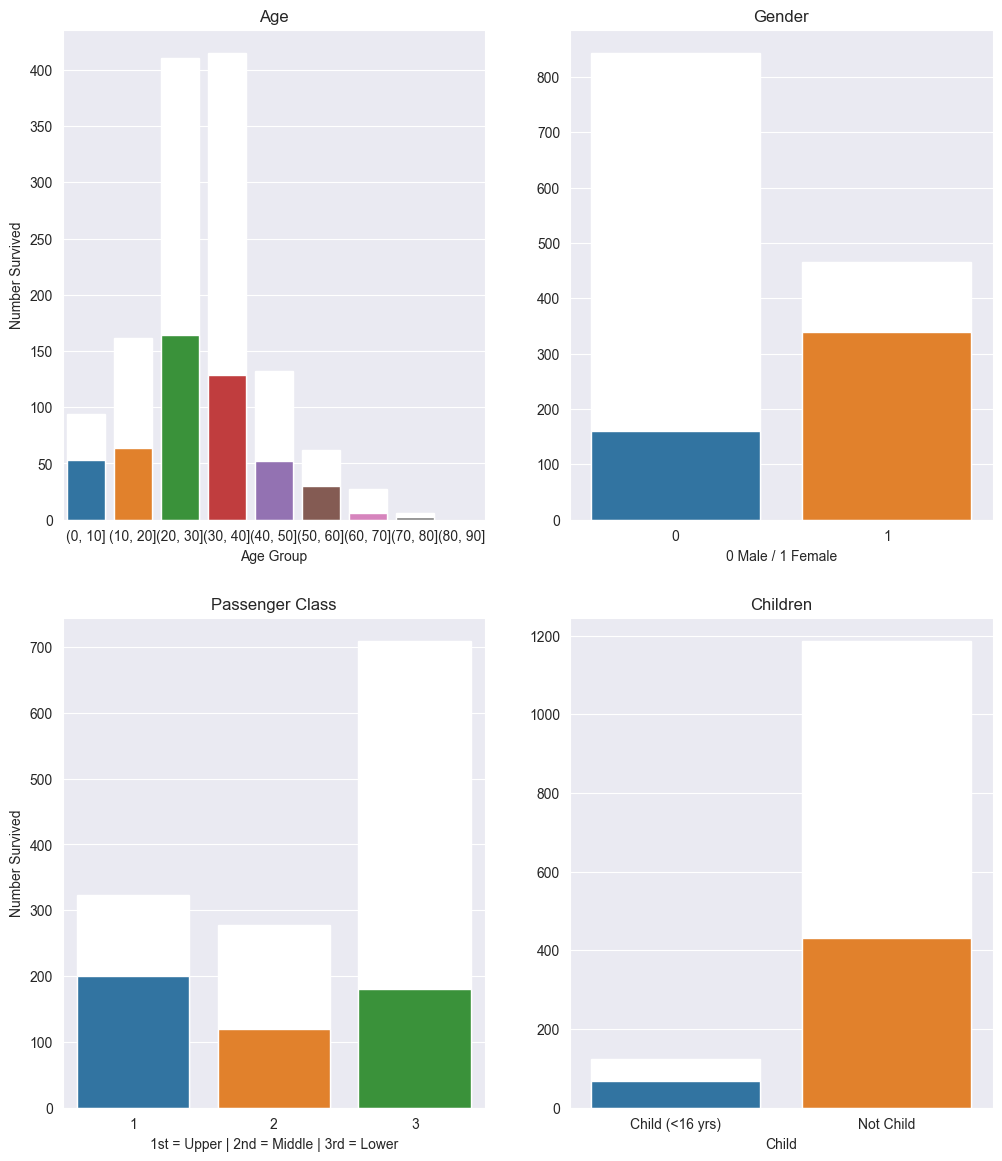

In [65]:
fig, ([ax1,ax2],[ax3,ax4]) = plt.subplots(2,2,figsize=(12,14))

sns.set_style('darkgrid')

sns.countplot(x='age_binned', color='white', ax=ax1, data=df)
sns.countplot(x='age_binned', ax=ax1, data=surv)
plt.xlabel('Age Group')
plt.ylabel('Total / Survived')
ax1.set_title('Age')
ax1.set_xlabel('Age Group')
ax1.set_ylabel('Number Survived')


sns.set_style('darkgrid')
sns.countplot(x='Sex', color='white', ax=ax2, data=df, order=[0,1])
sns.countplot(x='Sex', ax=ax2, data=surv,  order=[0,1])
plt.ylabel('Survived')
ax2.set_xlabel('0 Male / 1 Female')
ax2.set_title('Gender')
ax2.set_ylabel('')

sns.countplot(x='Pclass', color='white', ax=ax3, data=df,  order=[1, 2, 3])
sns.countplot(x='Pclass', ax=ax3, data=surv,  order=[1, 2, 3])
ax3.set_title('Passenger Class')
ax3.set_ylabel('Number Survived')
ax3.set_xlabel('1st = Upper | 2nd = Middle | 3rd = Lower')


sns.countplot(x='Child', color='white', ax=ax4, data=df, order=[1,0])
sns.countplot(x='Child', ax=ax4, data=surv, order=[1,0])
loc, labels = plt.xticks()
plt.xticks(loc,['Child (<16 yrs)','Not Child'])
plt.ylabel('Survived')
ax4.set_title('Children')
ax4.set_ylabel('')



Text(0, 0.5, '')

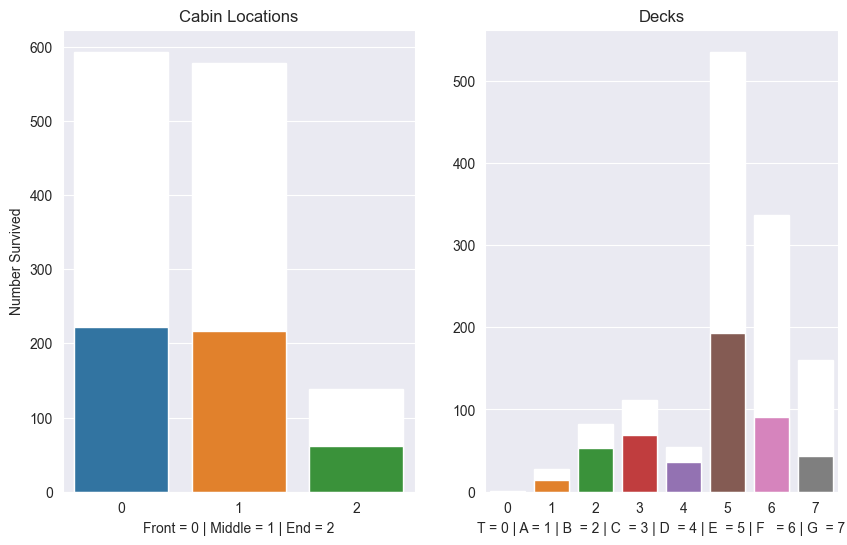

In [74]:
fig, ([ax1,ax2]) = plt.subplots(1,2,figsize=(10,6))

sns.set_style('darkgrid')
sns.countplot(x='Location', color='white', ax=ax1, data=df)
sns.countplot(x='Location', ax=ax1, data=surv)
plt.xlabel('Age Group')
plt.ylabel('Total / Survived')
ax1.set_title('Cabin Locations')
ax1.set_xlabel('Front = 0 | Middle = 1 | End = 2')
ax1.set_ylabel('Number Survived')


sns.set_style('darkgrid')
sns.countplot(x='Decks', color='white', ax=ax2, data=df, order=[0,1,2,3,4,5,6,7])
sns.countplot(x='Decks', ax=ax2, data=surv,  order=[0,1,2,3,4,5,6,7])
plt.ylabel('Survived')
ax2.set_xlabel('T = 0 | A = 1 | B  = 2 | C  = 3 | D  = 4 | E  = 5 | F   = 6 | G  = 7')
ax2.set_title('Decks')
ax2.set_ylabel('')

